<a href="https://colab.research.google.com/github/sjcorp/notebooks/blob/master/ml_fundamentals/ml_feature_engineering_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [16]:
gdurltitanic = 'https://drive.google.com/file/d/15tUbXaTIktuLzNjTq6euUHqBpGNuz7u6/view?usp=sharing'
gdtitanic = 'https://drive.google.com/uc?export=download&id='+gdurltitanic.split('/')[-2]
gdurlhousing = 'https://drive.google.com/file/d/11bQwRc8TIPWbLXwnElIOf_NygTCwomwa/view?usp=sharing'
gdhousing = 'https://drive.google.com/uc?export=download&id='+gdurlhousing.split('/')[-2]
gdmercedes = 'https://drive.google.com/uc?export=download&id='+'https://drive.google.com/file/d/1cgfq8R82cLL1xJYbh9jA_qbHihThzYHg/view?usp=sharing'.split('/')[-2]
githousing = 'https://raw.githubusercontent.com/sjcorp/notebooks/master/datasets/housing/train.csv'

# Lifecycle of a Data Science Project

1. Data Collection - Company Databases, 3rd Party APIs, Surveys
2. Feature Engineering - Handling Missing Values
3. Feature Engineering - Encoding
4. Feature Engineering - Transformation
5. Feature Selection
6. Model Training


# Handling Missing Values

What are the different types of missing data?
- MCAR: Missing completely at Random; in such cases disregarding those cases would not bias the inferences made.
- MNAR: Missing not at Random
- Missing at Random

Two types of data could be missing:
- Continuous Data
- Categorical Data


## MNAR
Here Cabin and Age have a lot of NAN values and they are not missing at random. Its because data was collected post the accident.

In [17]:
# Random Sample Imputation

import pandas as pd
df = pd.read_csv(gdtitanic)

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## MCAR

In [20]:
# Cabin value missing for people that survived
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)
df['cabin_null'].mean()

0.7710437710437711

In [21]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

### Missing at Random

- Men not quoting Salary
- Women not quoting Age

# Techniques of Handling Missing Values

1. Mean/Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN Values with a New Feature
4. End of Distribution Imputation
5. Arbitrary Imputation
6. Frequent Categories Imputation

# A. Continuous Value Imputation

## 1. Mean Median Mode Imputation

When?
- Data is missing completely at Random

How?
- Replace the NAN with most feequent occurance of variable

Advantages:
- Easy to implement
- Robust for outliers
- Fastest way to complete the dataset

Disadvantages:
- Distortion to the original variance


In [23]:
# Random Sample Imputation

import pandas as pd
df = pd.read_csv(gdtitanic, usecols = ['Age', 'Fare', 'Survived'])

In [24]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [25]:
def impute_nan(df, variable, median):
  df[variable+'_median'] = df[variable].fillna(median)

In [26]:
median = df.Age.median()
median

28.0

In [27]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [28]:
# Check if it has changed the normal distribution

print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334042
13.019696550973201


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

NameError: name 'labels' is not defined

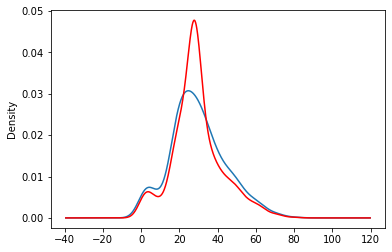

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax = ax)
df['Age_median'].plot(kind='kde', ax=ax,color='red')
lines, lables = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## 2. Random Sample Imputation
When: Used when values are missing completely at Random
How: Take random observation from the dataset to replace NaN Values

Pros:
- Easy to implement
- Less distortion in variance
Cons:
- In every situation, randomness wont work

In [31]:
# Random Sample Imputation

import pandas as pd
df = pd.read_csv(gdtitanic, usecols = ['Age', 'Fare', 'Survived'])

In [32]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [33]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [34]:
df['Age'].isnull().sum()

177

In [35]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [36]:
df['Age'].dropna().sample()

812    35.0
Name: Age, dtype: float64

In [37]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state = 0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [38]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [39]:
def impute_nan(df, variable, median):
  df[variable+"_median"] = df[variable].fillna(median)
  df[variable+"_random"] = df[variable]
  ## It will fill up the NA value with the random sample
  random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
  ## pandas need to have some index in order to merge the dataset
  random_sample.index=df[df[variable].isnull()].index
  df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [40]:
median = df.Age.median()
median

28.0

In [41]:
impute_nan(df,"Age",median)

In [42]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

## 3. Capturing NAN Values with a New Feature

This works well when data is not missing completely at random 

In [44]:
df

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


In [45]:
df = pd.read_csv(gdtitanic, usecols = ['Age', 'Fare', 'Survived'])

In [46]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [47]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [48]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


## 4. Arbitrary Value Imputation
This technique was derived from Kaggle Competitions
It inconsists of replacing NAN by an Arbitrary Value

Arbitrary Values Properties:
- It should be more frequently present

Advantages:
- Easy
- Captures the importance of missing variables

Disadvantages
- Distorts the original distribution of the variable
- If missing variables are not important, it may mask the predictive power of the original variable by distorting its distribution
- Hard to decide what value to use

In [49]:
import pandas as pd
df = pd.read_csv(gdtitanic,usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [50]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

## 5. End of Distribution imputation

In [51]:
df=pd.read_csv('gdtitanic.csv', usecols=['Age','Fare','Survived'])
df.head()

FileNotFoundError: [Errno 2] File gdtitanic.csv does not exist: 'gdtitanic.csv'

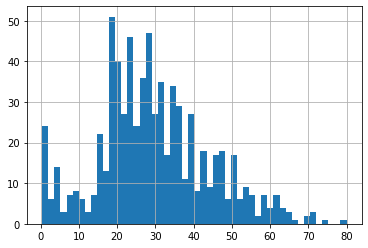

In [52]:
df.Age.hist(bins=50)

In [53]:
extreme=df.Age.mean()+3*df.Age.std()

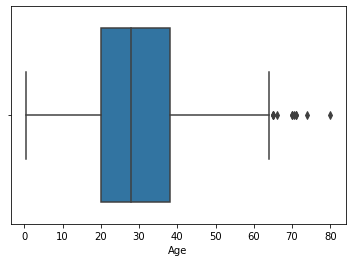

In [54]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [55]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [56]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [57]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


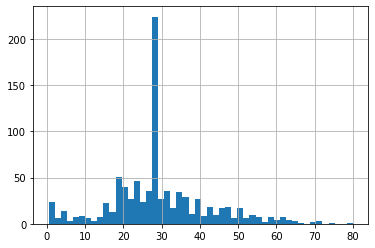

In [58]:
df['Age'].hist(bins=50)

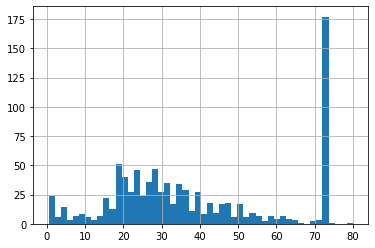

In [59]:
df['Age_end_distribution'].hist(bins=50)

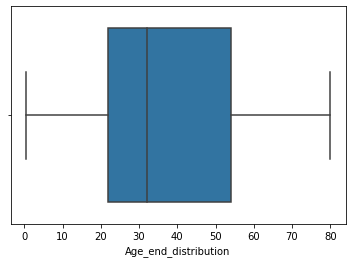

In [60]:
sns.boxplot('Age_end_distribution',data=df)

# B. Handling Missing Values for Categorical Variables

## 1. Frequent Category Imputation (Mode Imputation)

Advantages:
- Easy to implement

Disadvantages:
- Will distort the relationship between the most frequent values and output/dependent variable
- Since we are using the most frequent labels, it may over-represent them, if there are many NANs

In [61]:
import pandas as pd
df = pd.read_csv(gdhousing,usecols = ['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [62]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [63]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

Since BsmtQual & GarageType have very few missing values, we can replace them with the most frequently occuring value

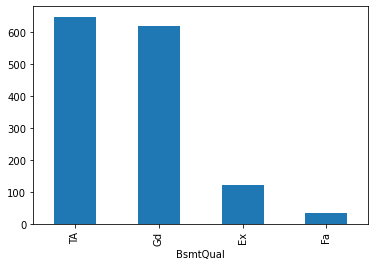

In [64]:
# Compute the frequency for each feature
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

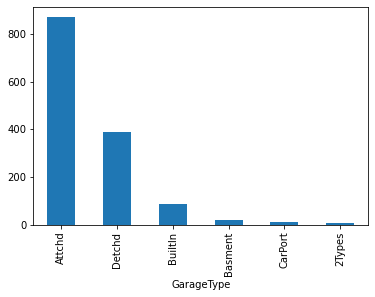

In [65]:
df.groupby(['GarageType'])['GarageType'].count().sort_values(ascending=False).plot.bar()

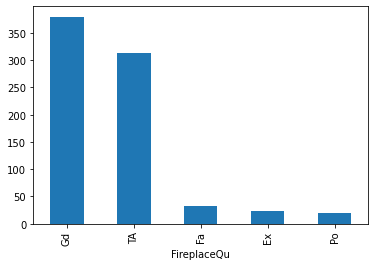

In [66]:
df.groupby(['FireplaceQu'])['FireplaceQu'].count().sort_values(ascending=False).plot.bar()

In [67]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [68]:
df['GarageType'].mode()[0]

'Attchd'

In [69]:
## Replacement Function
def impute_nan(df,variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [70]:
for features in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,features)

In [71]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

## 2. Adding a Variable to Capture NaN
Here we add the 'most frequent category' to the NaNs but at the same time by creating the new category, we are capturing the important of missing values.

In [72]:
import pandas as pd
df = pd.read_csv(gdhousing,usecols = ['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [73]:
import numpy as np
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [74]:
frequent = df['BsmtQual'].mode()[0]
df['BsmtQual'].fillna(frequent,inplace=True)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [75]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


## If there are multiple frequent categories, we just replace NaN with a compteley new category

In [76]:
import pandas as pd
df = pd.read_csv(gdhousing,usecols = ['BsmtQual','FireplaceQu','GarageType','SalePrice'])
print(df.head())
df.shape

  BsmtQual FireplaceQu GarageType  SalePrice
0       Gd         NaN     Attchd     208500
1       Gd          TA     Attchd     181500
2       Gd          TA     Attchd     223500
3       TA          Gd     Detchd     140000
4       Gd          TA     Attchd     250000


(1460, 4)

In [77]:
def impute_nan(df, variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [78]:
for features in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,features)

In [79]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [80]:
df = df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
